# Ejercicio 1 - Análisis Exploratorio y Preprocesamiento de Datos

<hr width="50%" align="left"/>
<br/>

## **Grupo 09**

## Integrantes:

<p>
<img align="left" src="https://github.com/mmaddalena.png" height=50 width=50 />

### [Martin Andres Maddalena](https://github.com/mmaddalena) (107610)
<br/>
</p>

<p>
<img align="left" src="https://github.com/Petroshka00.png" height=50 width=50 />

### [Tomas Petrocini](https://github.com/Petroshka00) (110157)
<br/>
</p>

<p>
<img align="left" src="https://github.com/mateozorzi.png" height=50 width=50 />

### [Mateo Zorzi](https://github.com/mateozorzi) (109634)
<br/>
</p>

<p>
<img align="left" src="https://github.com/AlanRichmond" height=50 width=50 />

### [Alan Richmond](https://github.com/AlanRichmond) (106783)
<br/>
</p>

<p>
<img align="left" src="https://github.com/integrante5.png" height=50 width=50 />

### [Integrante 5](https://github.com/integrante5) (padron integrante5)
<br/>
</p>

<hr width="50%" align="left"/>
<br/>


# Imports Generales

In [27]:
# Manipulacion de datos y funciones matemáticas
import pandas as pd
import numpy as np

# Visualizaciones
import seaborn as sns
import matplotlib.pyplot as plt

# Para trabajar con formato parquet
import pyarrow.parquet as pq

# Para chequear que los datasets ya estan importados
import os

!pip install gdown
import gdown

# Import Datasets

Si se quiere hacer la descarga de todos los archivos

## Julio

In [28]:
# usamos la copia del dataset que se encuentra subido en el repositorio del grupo
if not os.path.exists("yellow_tripdata_2024-07.parquet"):
  !wget https://github.com/mmaddalena/TA047R-2C2025-GRUPO09/raw/refs/heads/main/TP1/datasets/ej1/yellow_tripdata_2024-07.parquet
dataset_julio = pq.read_table("yellow_tripdata_2024-07.parquet")
dataset_julio = dataset_julio.to_pandas()

## Agosto

In [29]:
if not os.path.exists("yellow_tripdata_2024-08.parquet"):
  !wget https://github.com/mmaddalena/TA047R-2C2025-GRUPO09/raw/refs/heads/main/TP1/datasets/ej1/yellow_tripdata_2024-08.parquet
dataset_agosto = pq.read_table("yellow_tripdata_2024-08.parquet")
dataset_agosto = dataset_agosto.to_pandas()

## Septiembre

In [30]:
if not os.path.exists("yellow_tripdata_2024-09.parquet"):
  !wget https://github.com/mmaddalena/TA047R-2C2025-GRUPO09/raw/refs/heads/main/TP1/datasets/ej1/yellow_tripdata_2024-09.parquet
dataset_septiembre = pq.read_table("yellow_tripdata_2024-09.parquet")
dataset_septiembre = dataset_septiembre.to_pandas()

## Taxi zones

In [31]:
if not os.path.exists("taxi_zone_lookup.csv"):
  !wget https://raw.githubusercontent.com/mmaddalena/TA047R-2C2025-GRUPO09/refs/heads/main/TP1/datasets/ej1/taxi_zone_lookup.csv
zones = pd.read_csv("taxi_zone_lookup.csv")
zones

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN


## Unificamos los datasets

In [32]:
dataset = pd.concat([dataset_julio,dataset_agosto,dataset_septiembre],axis=0, ignore_index=True)
dataset.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
9689111,2,2024-09-30 23:14:05,2024-09-30 23:47:48,NaN,14.9,NaN,None,181,179,0,45.7,0.0,0.5,0.0,0.0,1.0,47.2,NaN,NaN
9689112,1,2024-09-30 23:29:30,2024-10-01 00:41:40,NaN,0.0,NaN,None,230,10,0,60.0,2.0,0.5,0.0,6.9,1.0,74.9,NaN,NaN
9689113,1,2024-09-30 23:48:10,2024-09-30 23:57:09,NaN,1.1,NaN,None,41,152,0,7.3,0.0,0.5,0.0,0.0,1.0,8.8,NaN,NaN
9689114,2,2024-09-30 23:02:31,2024-09-30 23:29:30,NaN,9.2,NaN,None,40,198,0,33.0,0.0,0.5,0.0,0.0,1.0,34.5,NaN,NaN
9689115,2,2024-09-30 23:24:09,2024-09-30 23:47:16,NaN,4.5,NaN,None,71,22,0,22.6,0.0,0.5,0.0,0.0,1.0,24.1,NaN,NaN


Vinculamos el dataset original con las zonas, creando nuevas variables a aprtir de la relacion entre los dos datasets.

`PULocationID` -> `PUBorough`, `PUZone`

`DOLocationID` -> `DOBorough`, `DOZone`

In [33]:
new_dataset = dataset.merge(right=zones, left_on="PULocationID", right_on="LocationID", how="left")
new_dataset.drop(["PULocationID", "LocationID", "service_zone"], axis=1, inplace=True)
new_dataset.rename(columns={"Borough": "PUBorough", "Zone": "PUZone"}, inplace=True)

new_dataset = new_dataset.merge(right=zones, left_on="DOLocationID", right_on="LocationID", how="left")
new_dataset.drop(["DOLocationID", "LocationID", "service_zone"], axis=1, inplace=True)
new_dataset.rename(columns={"Borough": "DOBorough", "Zone": "DOZone"}, inplace=True)
new_dataset

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,PUBorough,PUZone,DOBorough,DOZone
0,1,2024-07-01 00:34:56,2024-07-01 00:46:49,1.0,3.2,1.0,N,1,15.6,3.5,...,3.5,0.0,1.0,24.1,2.5,0.0,Manhattan,Lenox Hill East,Manhattan,East Village
1,2,2024-06-30 23:48:58,2024-07-01 00:28:04,1.0,19.5,2.0,N,2,70.0,0.0,...,0.0,0.0,1.0,75.8,2.5,1.8,Queens,JFK Airport,Manhattan,Greenwich Village North
2,2,2024-07-01 00:23:18,2024-07-01 00:29:51,1.0,1.2,1.0,N,1,8.6,1.0,...,2.7,0.0,1.0,16.3,2.5,0.0,Manhattan,Upper East Side South,Queens,Long Island City/Hunters Point
3,1,2024-07-01 00:10:33,2024-07-01 00:27:31,0.0,9.1,1.0,N,1,36.6,10.2,...,12.1,0.0,1.0,60.4,2.5,1.8,Queens,LaGuardia Airport,Manhattan,Midtown South
4,1,2024-07-01 00:07:55,2024-07-01 00:34:34,1.0,17.7,2.0,N,1,70.0,1.8,...,10.0,6.9,1.0,90.2,0.0,1.8,Queens,JFK Airport,Manhattan,Yorkville West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9689111,2,2024-09-30 23:14:05,2024-09-30 23:47:48,NaN,14.9,NaN,None,0,45.7,0.0,...,0.0,0.0,1.0,47.2,NaN,NaN,Brooklyn,Park Slope,Queens,Old Astoria
9689112,1,2024-09-30 23:29:30,2024-10-01 00:41:40,NaN,0.0,NaN,None,0,60.0,2.0,...,0.0,6.9,1.0,74.9,NaN,NaN,Manhattan,Times Sq/Theatre District,Queens,Baisley Park
9689113,1,2024-09-30 23:48:10,2024-09-30 23:57:09,NaN,1.1,NaN,None,0,7.3,0.0,...,0.0,0.0,1.0,8.8,NaN,NaN,Manhattan,Central Harlem,Manhattan,Manhattanville
9689114,2,2024-09-30 23:02:31,2024-09-30 23:29:30,NaN,9.2,NaN,None,0,33.0,0.0,...,0.0,0.0,1.0,34.5,NaN,NaN,Brooklyn,Carroll Gardens,Queens,Ridgewood


In [34]:
new_dataset.to_parquet("dataset_con_taxi_zones.parquet")

# Descargar Dataset

Se descarga el dataset ya configurado para utilizar



In [35]:
url = 'https://drive.google.com/file/d/1i6dRTBXb6TXWcnnieCNzubKhVfk4CqR8/view?usp=drive_link'
output_path = 'dataset_con_taxi_zones.parquet'
gdown.download(url, output_path, quiet=False,fuzzy=True)

dataset = pq.read_table("dataset_con_taxi_zones.parquet")
dataset = dataset.to_pandas()
dataset

Downloading...
From (original): https://drive.google.com/uc?id=1i6dRTBXb6TXWcnnieCNzubKhVfk4CqR8
From (redirected): https://drive.google.com/uc?id=1i6dRTBXb6TXWcnnieCNzubKhVfk4CqR8&confirm=t&uuid=23e49384-958f-4502-92b3-632c84276659
To: /content/dataset_con_taxi_zones.parquet
100%|██████████| 205M/205M [00:01<00:00, 109MB/s]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,PUBorough,PUZone,DOBorough,DOZone
0,1,2024-07-01 00:34:56,2024-07-01 00:46:49,1.0,3.2,1.0,N,1,15.6,3.5,...,3.5,0.0,1.0,24.1,2.5,0.0,Manhattan,Lenox Hill East,Manhattan,East Village
1,2,2024-06-30 23:48:58,2024-07-01 00:28:04,1.0,19.5,2.0,N,2,70.0,0.0,...,0.0,0.0,1.0,75.8,2.5,1.8,Queens,JFK Airport,Manhattan,Greenwich Village North
2,2,2024-07-01 00:23:18,2024-07-01 00:29:51,1.0,1.2,1.0,N,1,8.6,1.0,...,2.7,0.0,1.0,16.3,2.5,0.0,Manhattan,Upper East Side South,Queens,Long Island City/Hunters Point
3,1,2024-07-01 00:10:33,2024-07-01 00:27:31,0.0,9.1,1.0,N,1,36.6,10.2,...,12.1,0.0,1.0,60.4,2.5,1.8,Queens,LaGuardia Airport,Manhattan,Midtown South
4,1,2024-07-01 00:07:55,2024-07-01 00:34:34,1.0,17.7,2.0,N,1,70.0,1.8,...,10.0,6.9,1.0,90.2,0.0,1.8,Queens,JFK Airport,Manhattan,Yorkville West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9689111,2,2024-09-30 23:14:05,2024-09-30 23:47:48,NaN,14.9,NaN,None,0,45.7,0.0,...,0.0,0.0,1.0,47.2,NaN,NaN,Brooklyn,Park Slope,Queens,Old Astoria
9689112,1,2024-09-30 23:29:30,2024-10-01 00:41:40,NaN,0.0,NaN,None,0,60.0,2.0,...,0.0,6.9,1.0,74.9,NaN,NaN,Manhattan,Times Sq/Theatre District,Queens,Baisley Park
9689113,1,2024-09-30 23:48:10,2024-09-30 23:57:09,NaN,1.1,NaN,None,0,7.3,0.0,...,0.0,0.0,1.0,8.8,NaN,NaN,Manhattan,Central Harlem,Manhattan,Manhattanville
9689114,2,2024-09-30 23:02:31,2024-09-30 23:29:30,NaN,9.2,NaN,None,0,33.0,0.0,...,0.0,0.0,1.0,34.5,NaN,NaN,Brooklyn,Carroll Gardens,Queens,Ridgewood


# Exploración Inicial

Realizamos una exploración inicial de las variables presentes:

In [36]:
display(dataset.head(30))
filas, columnas = dataset.shape
print(f"El DataFrame, en su totalidad, tiene {filas} filas y {columnas} columnas.")


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,PUBorough,PUZone,DOBorough,DOZone
0,1,2024-07-01 00:34:56,2024-07-01 00:46:49,1.0,3.2,1.0,N,1,15.6,3.5,...,3.5,0.0,1.0,24.1,2.5,0.0,Manhattan,Lenox Hill East,Manhattan,East Village
1,2,2024-06-30 23:48:58,2024-07-01 00:28:04,1.0,19.5,2.0,N,2,70.0,0.0,...,0.0,0.0,1.0,75.8,2.5,1.8,Queens,JFK Airport,Manhattan,Greenwich Village North
2,2,2024-07-01 00:23:18,2024-07-01 00:29:51,1.0,1.2,1.0,N,1,8.6,1.0,...,2.7,0.0,1.0,16.3,2.5,0.0,Manhattan,Upper East Side South,Queens,Long Island City/Hunters Point
3,1,2024-07-01 00:10:33,2024-07-01 00:27:31,0.0,9.1,1.0,N,1,36.6,10.2,...,12.1,0.0,1.0,60.4,2.5,1.8,Queens,LaGuardia Airport,Manhattan,Midtown South
4,1,2024-07-01 00:07:55,2024-07-01 00:34:34,1.0,17.7,2.0,N,1,70.0,1.8,...,10.0,6.9,1.0,90.2,0.0,1.8,Queens,JFK Airport,Manhattan,Yorkville West
5,2,2024-07-01 00:19:42,2024-07-01 00:32:13,1.0,2.2,1.0,N,2,14.9,1.0,...,0.0,0.0,1.0,19.9,2.5,0.0,Manhattan,Greenwich Village South,Manhattan,Murray Hill
6,1,2024-07-01 00:09:04,2024-07-01 00:14:30,1.0,0.9,1.0,N,1,7.2,3.5,...,2.4,0.0,1.0,14.6,2.5,0.0,Manhattan,West Chelsea/Hudson Yards,Manhattan,East Chelsea
7,1,2024-07-01 00:34:04,2024-07-01 00:43:13,1.0,2.1,1.0,N,1,12.1,3.5,...,2.6,0.0,1.0,19.7,2.5,0.0,Manhattan,East Chelsea,Manhattan,Gramercy
8,1,2024-07-01 00:59:52,2024-07-01 01:05:27,2.0,1.0,1.0,N,1,7.9,3.5,...,0.1,0.0,1.0,13.0,2.5,0.0,Manhattan,West Village,Manhattan,East Village
9,1,2024-07-01 00:43:12,2024-07-01 00:50:08,1.0,0.8,1.0,N,1,6.5,3.5,...,2.3,0.0,1.0,13.8,2.5,0.0,Manhattan,East Chelsea,Manhattan,West Chelsea/Hudson Yards


El DataFrame, en su totalidad, tiene 9689116 filas y 21 columnas.


| Tipo de Variable |  Símbolo  |
|:----------------:|:---------:|
|Cualitativa|   ★  |
|Cuantitativa Discreta|    ♣   |
|Cuantitativa Continua|    ♠   |

<br/><hr width="25%" align="left" /><br/>

* **★ VendorID:** Tipo de proveedor participante de TPEP (Taxicab & Livery Passenger Enhancement Programs):
  * `1`: Creative Mobile Technologies, LLC
  * `2`: Curb Mobility, LLC
  * `6`: Myle Technologies Inc
  * `7`: Helix

* **??? tpep_pickup_datetime:** La fecha y hora en que se activó el taximetro.

* **??? tpep_dropoff_datetime:** La fecha y hora en que se desactivó el taximetro.

* **♣ passenger_count:** El número de pasajeros en el vehiculo.

* **♠ trip_distance:** La distancia del viaje transcurrida en millas informada por el taxímetro.

* **★ RatecodeID:** Código de tarifa final vigente al final del viaje.
  * `1`: Standard rate
  * `2`: JFK
  * `3`: Newark
  * `4`: Nassau or Westchester
  * `5`: Negotiated fare
  * `6`: Group ride
  * `99`: Null/unknown

* **★ store_and_fwd_flag:** Flag que indica si el registro del viaje se mantuvo en la memoria del vehículo antes de enviarlo al proveedor (almacenamiento y reenvío), porque el vehículo no tenía conexión al servidor.
  * `Y`: Viaje almacenado y reenviado
  * `N`: Viaje no almacenado y reenviado

* **★ PULocationID:** Zona de Taxi TLC (Taxi and Limousine Commission) en la cual fue activado el taxímetro.

* **★ DOLocationID:** Zona de Taxi TLC en la cual fue desactivado el taxímetro.

* **★ payment_type:** Un código numérico que indica cómo el pasajero pagó el viaje.
  * `0`: Flex Fare trip
  * `1`: Credit Card
  * `2`: Cash
  * `3`: No charge
  * `4`: Dispute
  * `5`: Unknown
  * `6`: Voided trip

* **♠ fare_amount:** La tarifa por tiempo y distancia calculada por el taxímetro.

* **♠ extra:** Extras y recargos varios.

* **♠ mta_tax:** Impuesto que se activa automáticamente en función de la tasa medida en uso.

* **♠ tip_amount:** Propinas realizadas con tarjeta de crédito. No se incluyen las propinas en efectivo.

* **♠ tolls_amount:** Importe total de todos los peajes pagados en el viaje.

* **♠ improvement_surcharge:** Recargo por mejoras para viajes aplicado en la bajada de bandera.

* **♠ total_amount:** Importe total cobrado a los pasajeros. No incluye propinas en efectivo.

* **♠ congestion_surcharge:** Monto total recaudado en el viaje por el recargo por congestión del estado de Nueva York.

* **♠ airport_fee:** Impuesto por recoger pasajeros en los aeropuertos LaGuardia y John F. Kennedy.

## Variables Cuantitativas

In [37]:
# removemos primero las columnas con valores categóricos pero aparentemente numéricos
dataset_cuantitativas = dataset.drop(["VendorID", "tpep_pickup_datetime", "tpep_dropoff_datetime", "RatecodeID", "store_and_fwd_flag", "payment_type"], axis=1, inplace=False)
# cambiamos de notación científica a notación decimal y cambiamos la cantidad de cifras
pd.set_option('display.float_format', lambda x: '%.1f' % x)
# hacemos un resumen con las variables que quedan
dataset_cuantitativas.describe()

,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,8667729.0,9689116.0,9689116.0,9689116.0,9689116.0,9689116.0,9689116.0,9689116.0,9689116.0,8667729.0,8667729.0
mean,1.3,5.3,19.8,1.4,0.5,3.3,0.6,1.0,28.3,2.2,0.2
std,0.8,433.9,20.5,1.8,0.1,4.2,2.3,0.3,25.3,0.9,0.5
min,0.0,0.0,-2261.2,-7.5,-0.5,-93.4,-116.7,-1.0,-2265.4,-2.5,-1.8
25%,1.0,1.0,9.3,0.0,0.5,0.0,0.0,1.0,15.8,2.5,0.0
50%,1.0,1.8,14.2,1.0,0.5,2.5,0.0,1.0,21.0,2.5,0.0
75%,1.0,3.5,23.1,2.5,0.5,4.2,0.0,1.0,31.1,2.5,0.0
max,9.0,330397.6,2261.2,16.2,10.5,524.0,476.4,1.0,2265.4,2.5,1.8


<hr width="30%" align="left" />

## Variables Categóricas

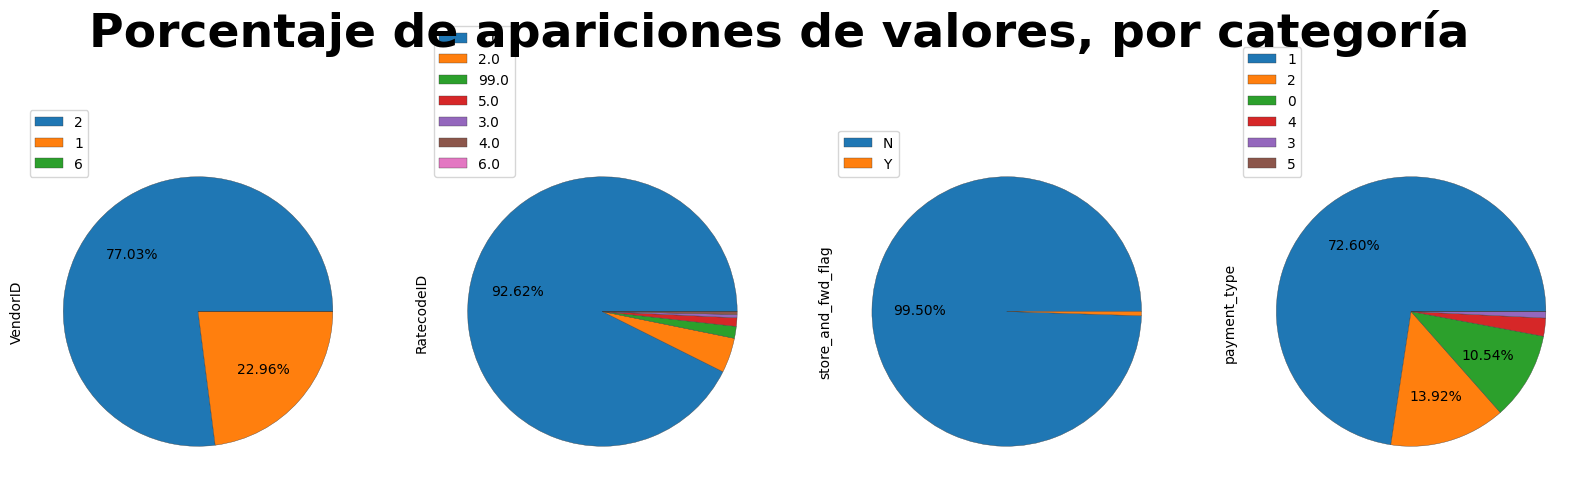

In [38]:
import matplotlib.pyplot as plt

variables_categoricas = ["VendorID", "RatecodeID", "store_and_fwd_flag", "payment_type"]
limite_valores = 10
limite_porcentaje = 10.0

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20, 5)) # Adjusted for 4 plots
fig.suptitle("Porcentaje de apariciones de valores, por categoría", y=1.1, fontsize=34, weight="bold")

for i, categoria in enumerate(variables_categoricas):
    cuenta = dataset[categoria].value_counts().to_frame()
    if len(cuenta) > limite_valores:
        cuenta = cuenta.head(limite_valores)

    ax = cuenta.plot.pie(subplots=True, ylabel=categoria,
                         autopct=(lambda pct: "%1.2f%%" % pct if pct >= limite_porcentaje else ""), # No mostrar porcentajes menores a 10%
                         pctdistance=0.65,
                         wedgeprops={"edgecolor": "#3c3c3c", "linewidth": 0.25},
                         legend=True, labeldistance=None,
                         ax=axes[i]) # Corrected indexing for axes
    # 'ax' is, in fact, an array of a single element: the 'Axes'. This is due to subplots=True
    ax[0].legend(loc=(0, 0.9))

## Correlaciones

Comprobamos a continuación la correlación entre las variables:

Text(0.5, 1.05, 'Correlaciones entre cada par de variables')

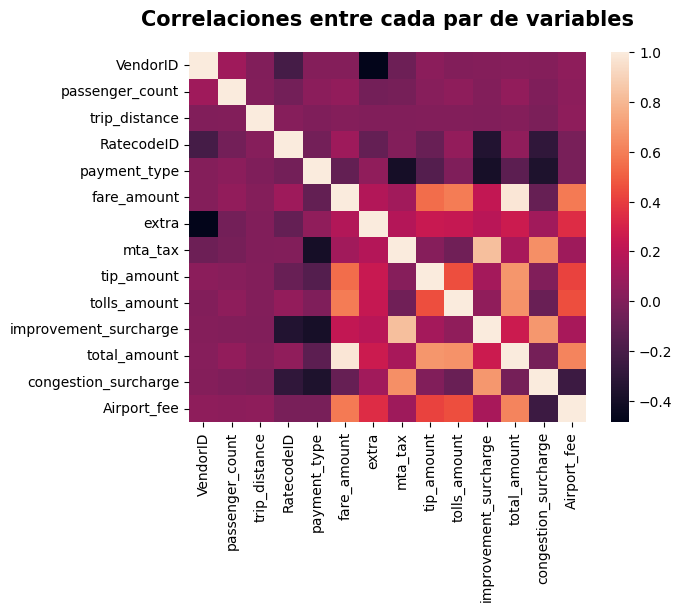

In [39]:
correlaciones = dataset.corr(numeric_only=True)
sns.heatmap(correlaciones)
plt.title("Correlaciones entre cada par de variables",
          y=1.05,
          fontdict={"size": 15, "weight": "bold"})

Correlaciones sobresalientes:
1. `total_amount` y `fare_amount`
2. `improvement_surcharge` y `mta_tax`
3. `total_amount` y `tip_amount`
4. `total_amount` y `tolls_amount`
5. `total_amount` y `airport_fee`

# Datos Faltantes

Primero, comprobamos de que no hay filas repetidas:

In [40]:
duplicados = dataset.duplicated(keep=False).sum()
print(f"Número de filas duplicadas: {duplicados}")

Número de filas duplicadas: 2


analizamos los valores nulos:

In [41]:
df_columnas_con_nulos = dataset.copy()
variables = df_columnas_con_nulos.columns
total = len(df_columnas_con_nulos.index)

for var in variables:
    cant_nulos = df_columnas_con_nulos[var].isna().sum()
    if cant_nulos == 0:
        df_columnas_con_nulos.drop(var, axis=1, inplace=True)
df_columnas_con_nulos.head(10)

,passenger_count,RatecodeID,store_and_fwd_flag,congestion_surcharge,Airport_fee,PUBorough,PUZone,DOBorough,DOZone
0,1.0,1.0,N,2.5,0.0,Manhattan,Lenox Hill East,Manhattan,East Village
1,1.0,2.0,N,2.5,1.8,Queens,JFK Airport,Manhattan,Greenwich Village North
2,1.0,1.0,N,2.5,0.0,Manhattan,Upper East Side South,Queens,Long Island City/Hunters Point
3,0.0,1.0,N,2.5,1.8,Queens,LaGuardia Airport,Manhattan,Midtown South
4,1.0,2.0,N,0.0,1.8,Queens,JFK Airport,Manhattan,Yorkville West
5,1.0,1.0,N,2.5,0.0,Manhattan,Greenwich Village South,Manhattan,Murray Hill
6,1.0,1.0,N,2.5,0.0,Manhattan,West Chelsea/Hudson Yards,Manhattan,East Chelsea
7,1.0,1.0,N,2.5,0.0,Manhattan,East Chelsea,Manhattan,Gramercy
8,2.0,1.0,N,2.5,0.0,Manhattan,West Village,Manhattan,East Village
9,1.0,1.0,N,2.5,0.0,Manhattan,East Chelsea,Manhattan,West Chelsea/Hudson Yards


`passenger_count`, `RatecodeID`, `store_and_fwd_flag`, `congestion_surcharge`, `Airport_fee` son las únicas variables que tienen al menos un valor nulo.

Cantidad de valores nulos por variable:

In [42]:
print(dataset.isna().sum())

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count          1021387
trip_distance                  0
RatecodeID               1021387
store_and_fwd_flag       1021387
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge     1021387
Airport_fee              1021387
PUBorough                   6547
PUZone                     27308
DOBorough                  53442
DOZone                     38500
dtype: int64


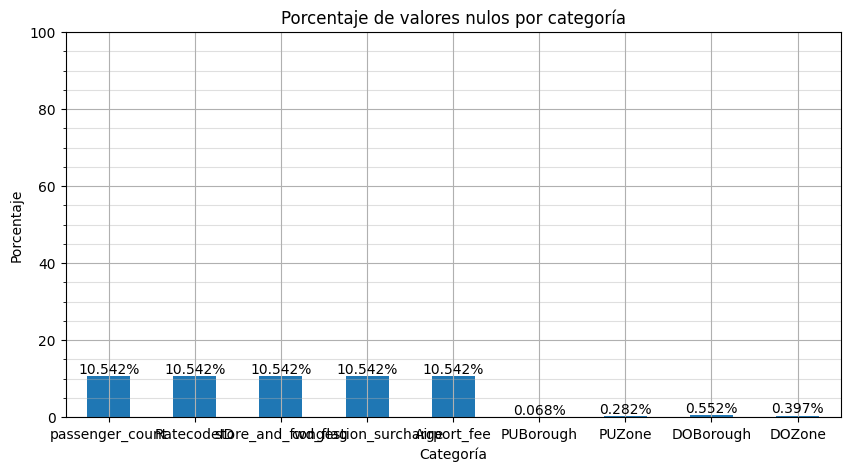

In [43]:
serie_col_con_nulos = df_columnas_con_nulos.isna().sum() / len(df_columnas_con_nulos.index) * 100

ax = serie_col_con_nulos.plot.bar(title="Porcentaje de valores nulos por categoría",
                                  xlabel="Categoría", ylabel="Porcentaje", rot=0.0,
                                  yticks=np.arange(0, 101, 20), figsize=(10,5))
ax.set_yticks(np.arange(0, 101, 5), minor=True)
ax.grid(which="major", alpha=1.0)
ax.grid(which="minor", alpha=0.4)
for cont in ax.containers:
    ax.bar_label(container=cont, fmt="%1.3f%%")

1. `passenger_count` tiene una cantidad considerable de valores nulos, pero podemos inferir un valor usando el resto de los valores disponibles. En este caso decidimos utilizar la media, ya que es una variable cuantitativa discreta.
2. `RatecodeID` tiene valores nulos que en realidad deberían ser un 99.
3. `store_and_fwd_flag` tiene una cantidad considerable de valores nulos, pero podemos inferir un valor usando el resto de los valores disponibles. En este caso dado que un 99.5% de los datos tiene un N, podemos inferir ese valor para los faltantes.
4. `congestion_surcharge` tiene una cantidad considerable de valores nulos, pero podemos inferir un valor usando el resto de los valores disponibles. En este caso decidimos utilizar el promedio para los valores faltantes.
5. `Airport_fee` tiene una cantidad considerable de valores nulos, pero podemos inferir un valor usando el resto de los valores disponibles. En este caso si la zona de comienzo del viaje es LaGuardia Airport o JFK Airport, entonces se cobra una tarifa de 1.75, sino cero.

### Rellenado `passenger_count`


In [44]:
print("Cantidad nulos en la columna passenger_count: ", dataset["passenger_count"].isna().sum())
print("Media: ", dataset["passenger_count"].median())
print("Promedio: ", dataset["passenger_count"].mean())
print("--------------------------------------------")
dataset["passenger_count"] = dataset["passenger_count"].fillna(dataset["passenger_count"].median())
print("Luego de rellenar los valores nulos:")
print("Cantidad nulos en la columna passenger_count: ", dataset["passenger_count"].isna().sum())
print("Media: ", dataset["passenger_count"].median())
print("Promedio: ", dataset["passenger_count"].mean())

Cantidad nulos en la columna passenger_count:  1021387
Media:  1.0
Promedio:  1.3374512516484998
--------------------------------------------
Luego de rellenar los valores nulos:
Cantidad nulos en la columna passenger_count:  0
Media:  1.0
Promedio:  1.301878520186981


### Rellenado `RatecodeID`

In [45]:
print("Cantidad nulos en la columna RatecodeID: ", dataset["RatecodeID"].isna().sum())
print("--------------------------------------------")
dataset["RatecodeID"] = dataset["RatecodeID"].fillna(99)
print("Luego de rellenar los valores nulos:")
print("Cantidad nulos en la columna RatecodeID: ", dataset["RatecodeID"].isna().sum())

Cantidad nulos en la columna RatecodeID:  1021387
--------------------------------------------
Luego de rellenar los valores nulos:
Cantidad nulos en la columna RatecodeID:  0


### Rellenado `store_and_fwd_flag`

In [46]:
print("Cantidad nulos en la columna store_and_fwd_flag: ", dataset["store_and_fwd_flag"].isna().sum())
print("--------------------------------------------")
dataset["store_and_fwd_flag"] = dataset["store_and_fwd_flag"].fillna("N")
print("Luego de rellenar los valores nulos:")
print("Cantidad nulos en la columna store_and_fwd_flag: ", dataset["store_and_fwd_flag"].isna().sum())

Cantidad nulos en la columna store_and_fwd_flag:  1021387
--------------------------------------------
Luego de rellenar los valores nulos:
Cantidad nulos en la columna store_and_fwd_flag:  0


### Rellenado `congestion_surcharge`

In [47]:
print("Cantidad nulos en la columna congestion_surcharge: ", dataset["congestion_surcharge"].isna().sum())
print("Media: ", dataset["congestion_surcharge"].median())
print("Promedio: ", dataset["congestion_surcharge"].mean())
print("--------------------------------------------")
dataset["congestion_surcharge"] = dataset["congestion_surcharge"].fillna(dataset["congestion_surcharge"].mean())
print("Luego de rellenar los valores nulos:")
print("Media: ", dataset["congestion_surcharge"].median())
print("Promedio: ", dataset["congestion_surcharge"].mean())
print("Cantidad nulos en la columna congestion_surcharge: ", dataset["congestion_surcharge"].isna().sum())

Cantidad nulos en la columna congestion_surcharge:  1021387
Media:  2.5
Promedio:  2.1978054170821446
--------------------------------------------
Luego de rellenar los valores nulos:
Media:  2.5
Promedio:  2.1978054170821513
Cantidad nulos en la columna congestion_surcharge:  0


### Rellenado `Airport_fee`

In [48]:
print("Cantidad nulos en la columna Airport_fee: ", dataset["Airport_fee"].isna().sum())
print("--------------------------------------------")
dataset["Airport_fee"] = dataset["Airport_fee"].fillna(
    dataset["PUZone"].apply(lambda x: 1.75 if x in ["LaGuardia Airport", "JFK Airport"] else 0))
print("Luego de rellenar valores nulos:")
print("Cantidad nulos en la columna Airport_fee: ", dataset["Airport_fee"].isna().sum())

Cantidad nulos en la columna Airport_fee:  1021387
--------------------------------------------
Luego de rellenar valores nulos:
Cantidad nulos en la columna Airport_fee:  0


In [49]:
print(dataset.isna().sum())

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
store_and_fwd_flag           0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
Airport_fee                  0
PUBorough                 6547
PUZone                   27308
DOBorough                53442
DOZone                   38500
dtype: int64


Al comprobar nuevamente las columnas con valores nulos, se puede observar como solo quedan en las columnas de comienza y final de los viajes. Esos valores nulos en el dataset original corresponden a una zona desconocida.

# Analisis de casos raros


In [50]:
cols_to_sum = ["fare_amount", "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "congestion_surcharge", "Airport_fee"]

df_nuevo = dataset.copy()

df_nuevo["suma_real"] = df_nuevo[cols_to_sum].sum(axis=1)

df_nuevo = df_nuevo[df_nuevo["suma_real"] != df_nuevo["total_amount"]]

df_nuevo.head()
#print(df_nuevo.shape)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,PUBorough,PUZone,DOBorough,DOZone,suma_real
0,1,2024-07-01 00:34:56,2024-07-01 00:46:49,1.0,3.2,1.0,N,1,15.6,3.5,...,0.0,1.0,24.1,2.5,0.0,Manhattan,Lenox Hill East,Manhattan,East Village,26.6
3,1,2024-07-01 00:10:33,2024-07-01 00:27:31,0.0,9.1,1.0,N,1,36.6,10.2,...,0.0,1.0,60.4,2.5,1.8,Queens,LaGuardia Airport,Manhattan,Midtown South,64.7
4,1,2024-07-01 00:07:55,2024-07-01 00:34:34,1.0,17.7,2.0,N,1,70.0,1.8,...,6.9,1.0,90.2,0.0,1.8,Queens,JFK Airport,Manhattan,Yorkville West,91.9
6,1,2024-07-01 00:09:04,2024-07-01 00:14:30,1.0,0.9,1.0,N,1,7.2,3.5,...,0.0,1.0,14.6,2.5,0.0,Manhattan,West Chelsea/Hudson Yards,Manhattan,East Chelsea,17.1
7,1,2024-07-01 00:34:04,2024-07-01 00:43:13,1.0,2.1,1.0,N,1,12.1,3.5,...,0.0,1.0,19.7,2.5,0.0,Manhattan,East Chelsea,Manhattan,Gramercy,22.2


In [51]:
df_contar_nans = dataset[dataset["passenger_count"].isna()]
df_contar_nans.shape

(0, 21)

In [52]:
df_tiempos_ilogicos = dataset[dataset["tpep_pickup_datetime"] > dataset["tpep_dropoff_datetime"]]
df_tiempos_ilogicos.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,PUBorough,PUZone,DOBorough,DOZone
321676,1,2024-07-05 14:30:00,2024-07-05 14:23:11,1.0,0.4,99.0,N,1,16.5,0.0,...,0.0,0.0,0.0,17.0,0.0,0.0,Brooklyn,Marine Park/Mill Basin,Brooklyn,Marine Park/Mill Basin
443620,1,2024-07-07 09:30:00,2024-07-07 09:06:21,1.0,2.4,99.0,N,1,21.5,0.0,...,0.0,0.0,0.0,22.0,0.0,0.0,Brooklyn,Crown Heights North,Brooklyn,Canarsie
447910,1,2024-07-07 10:15:00,2024-07-07 10:13:15,1.0,0.4,99.0,N,1,16.5,0.0,...,0.0,0.0,0.0,17.0,0.0,0.0,Brooklyn,Erasmus,Brooklyn,Prospect-Lefferts Gardens
542762,1,2024-07-08 14:30:00,2024-07-08 13:49:30,1.0,5.7,99.0,N,1,29.5,0.0,...,0.0,0.0,1.0,31.0,0.0,0.0,Brooklyn,Bay Ridge,Brooklyn,Clinton Hill
1607844,1,2024-07-19 09:00:00,2024-07-19 08:52:58,1.0,7.6,99.0,N,1,35.5,0.0,...,0.0,6.9,0.0,42.9,0.0,0.0,Bronx,Schuylerville/Edgewater Park,Queens,Middle Village


# Identificación y análisis de valores atípicos.

- Identificación de outliers

Viajes con distancia <= 0: 186579
Viajes con duración > 24h: 74


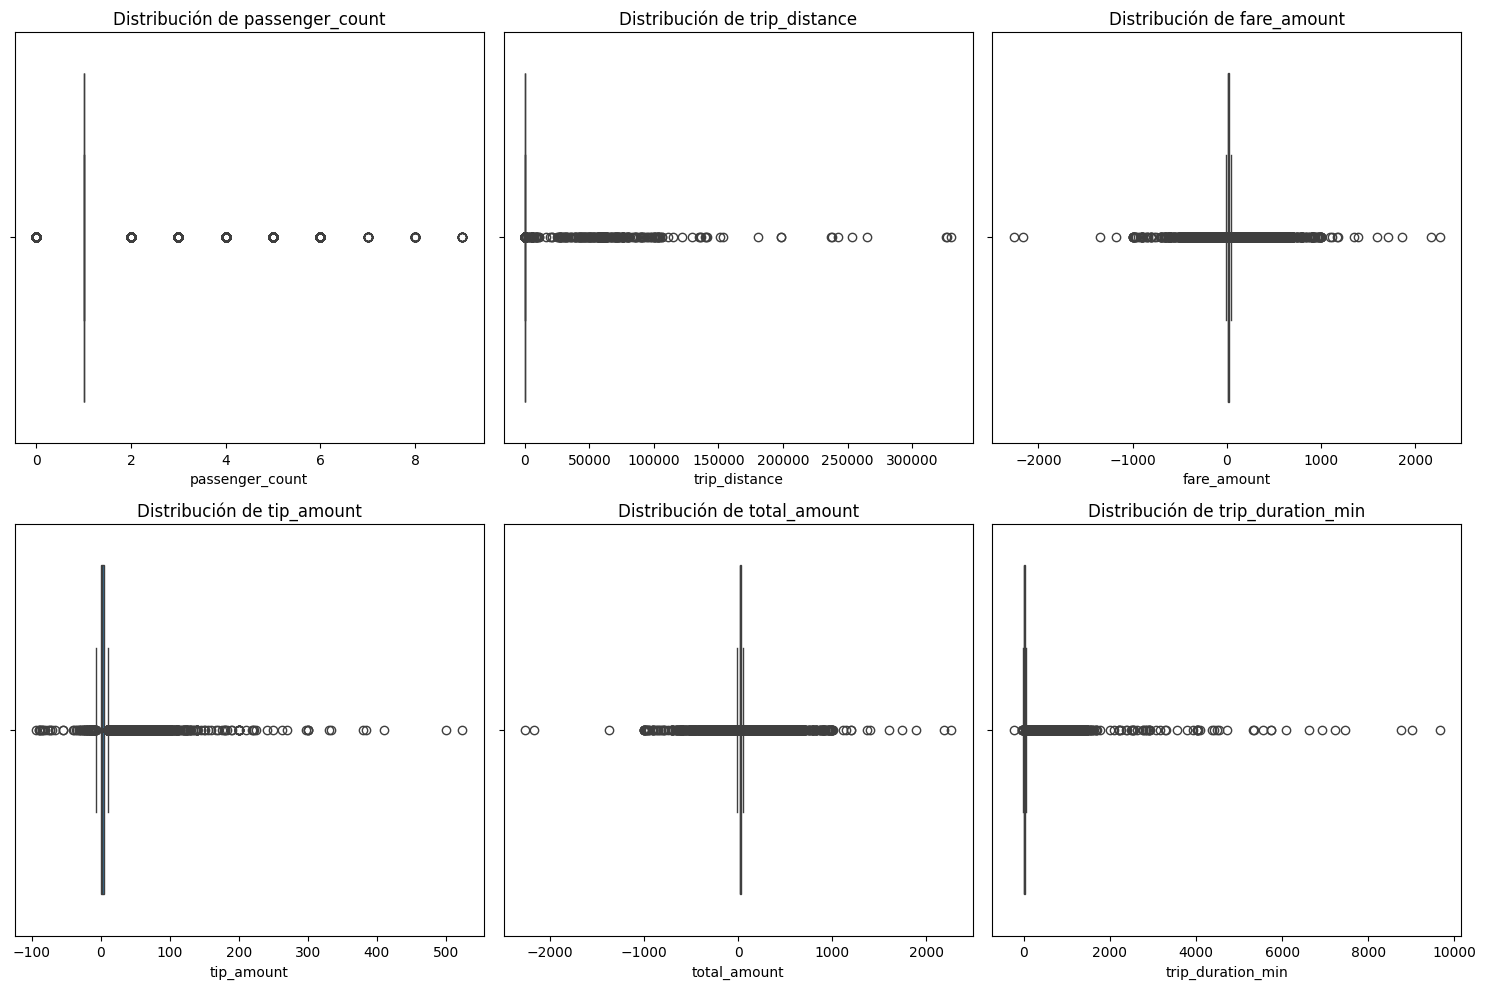

outlier_label
 1    9592224
-1      96892
Name: count, dtype: int64


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,...,total_amount,congestion_surcharge,Airport_fee,PUBorough,PUZone,DOBorough,DOZone,trip_duration_min,tip_percentage,outlier_label
248,2,2024-07-01 00:25:41,2024-07-01 00:58:44,1.0,20.4,4.0,N,1,145.8,1.0,...,178.0,0.0,0.0,None,Outside of NYC,None,Outside of NYC,33.0,20.3,-1
259,2,2024-07-01 00:25:54,2024-07-01 01:10:46,1.0,25.1,1.0,N,1,94.0,1.0,...,118.8,2.5,0.0,Manhattan,TriBeCa/Civic Center,Brooklyn,Canarsie,44.9,21.1,-1
261,2,2024-07-01 00:15:37,2024-07-01 00:55:06,1.0,27.2,4.0,N,1,127.6,1.0,...,148.8,0.0,1.8,Queens,JFK Airport,None,Outside of NYC,39.5,7.8,-1
366,2,2024-07-01 00:17:59,2024-07-01 00:18:22,2.0,0.0,5.0,N,1,140.0,0.0,...,193.6,0.0,0.0,None,Outside of NYC,None,Outside of NYC,0.4,23.0,-1
427,2,2024-07-01 00:22:27,2024-07-01 00:57:21,2.0,30.0,3.0,N,1,128.7,6.0,...,205.8,0.0,1.8,Queens,East Elmhurst,None,Outside of NYC,34.9,26.4,-1
642,2,2024-07-01 00:50:35,2024-07-01 01:58:58,6.0,22.2,1.0,N,2,87.0,1.0,...,92.0,2.5,0.0,Manhattan,Clinton East,Unknown,None,68.4,0.0,-1
672,2,2024-07-01 00:12:05,2024-07-01 00:48:06,1.0,28.1,4.0,N,1,175.9,1.0,...,215.8,0.0,1.8,Queens,JFK Airport,None,Outside of NYC,36.0,20.3,-1
702,2,2024-07-01 00:16:13,2024-07-01 00:50:42,4.0,17.9,2.0,N,1,70.0,0.0,...,102.9,2.5,1.8,Queens,JFK Airport,Manhattan,Times Sq/Theatre District,34.5,28.9,-1
928,1,2024-07-01 00:27:16,2024-07-01 01:25:52,4.0,9.8,5.0,N,1,49.0,0.0,...,70.0,0.0,0.0,Manhattan,Flatiron,None,Outside of NYC,58.6,40.8,-1
1010,1,2024-07-01 00:22:21,2024-07-01 00:22:21,0.0,0.0,99.0,Y,3,178.9,0.0,...,178.9,0.0,0.0,Bronx,University Heights/Morris Heights,Unknown,None,0.0,0.0,-1


In [53]:
from sklearn.ensemble import IsolationForest

# Copiamos dataset para no modificar el original
df_outliers = dataset.copy()

# Creamos variables derivadas útiles
df_outliers["trip_duration_min"] = (pd.to_datetime(df_outliers["tpep_dropoff_datetime"]) -
                                    pd.to_datetime(df_outliers["tpep_pickup_datetime"])).dt.total_seconds() / 60

df_outliers["tip_percentage"] = np.where(df_outliers["fare_amount"] > 0,
                                         df_outliers["tip_amount"] / df_outliers["fare_amount"] * 100,
                                         0)

# Seleccionamos features relevantes para detección de outliers
features = ["passenger_count", "trip_distance", "fare_amount", "tip_amount", "total_amount", "trip_duration_min"]

# --- Outliers unidimensionales ---
# Ejemplo: viajes con distancia negativa o cero
outliers_distancia = df_outliers[df_outliers["trip_distance"] <= 0]
print(f"Viajes con distancia <= 0: {len(outliers_distancia)}")

# Ejemplo: duraciones imposibles (> 1 día en un taxi)
outliers_duracion = df_outliers[df_outliers["trip_duration_min"] > 1440]
print(f"Viajes con duración > 24h: {len(outliers_duracion)}")

# Boxplots para ver valores extremos en las principales variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(features):
    sns.boxplot(x=df_outliers[col], ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(f"Distribución de {col}")
plt.tight_layout()
plt.show()

# --- Outliers multidimensionales con Isolation Forest ---
iforest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
df_outliers["outlier_label"] = iforest.fit_predict(df_outliers[features].fillna(0))

print(df_outliers["outlier_label"].value_counts())

# Visualizamos algunos viajes anómalos detectados
outliers_detectados = df_outliers[df_outliers["outlier_label"] == -1]
display(outliers_detectados.head(10))


Caracterizar los outliers:

In [54]:
print(outliers_detectados[["trip_distance","fare_amount","tip_amount","total_amount","trip_duration_min"]].describe())


       trip_distance  fare_amount  tip_amount  total_amount  trip_duration_min
count        96892.0      96892.0     96892.0       96892.0            96892.0
mean            20.3         82.2        15.5         107.0               61.0
std            144.1         88.6        13.8         101.3              112.3
min              0.0      -2261.2       -90.0       -2265.4                0.0
25%             16.0         70.0         0.0          96.2               35.8
50%             19.1         88.1        17.5         116.9               51.8
75%             24.2        108.0        22.3         143.5               70.1
max          42594.2       2261.2       410.0        2265.4             4033.2


Mostramos Histogramas para comparar normales vs outliers

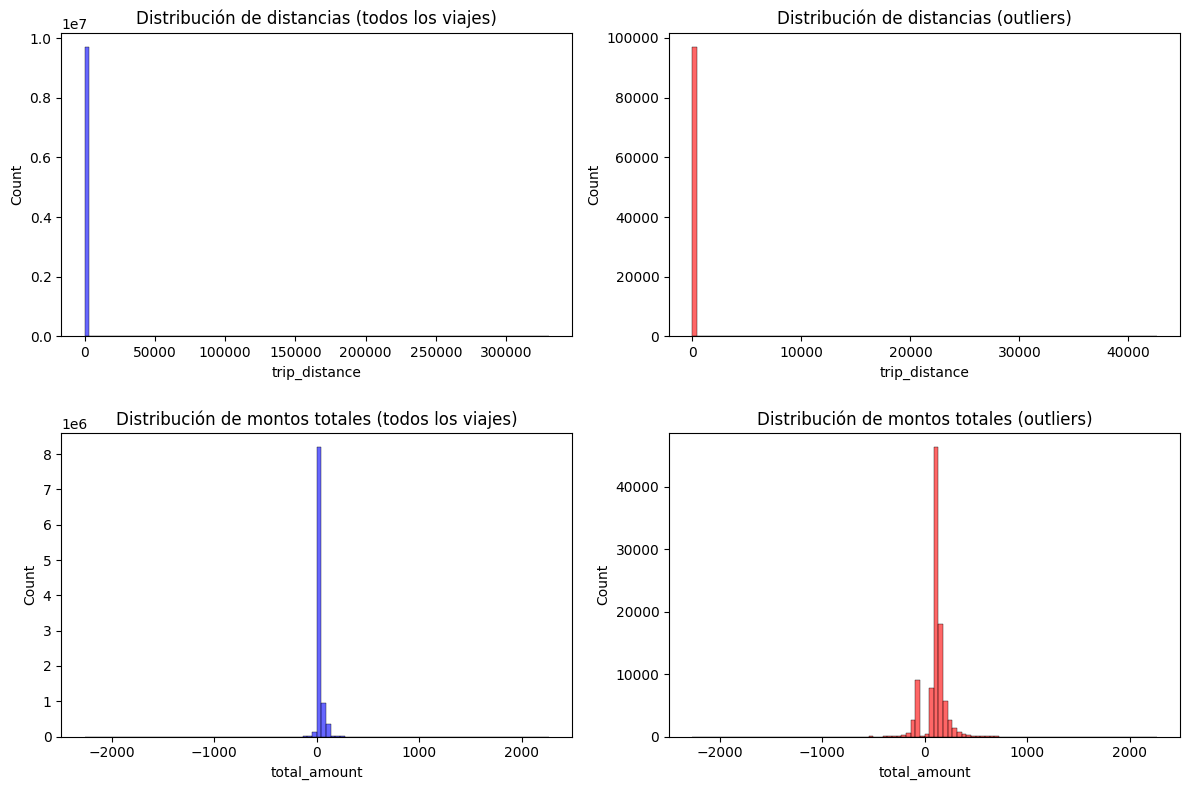

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.histplot(dataset["trip_distance"], bins=100, ax=axes[0,0], color="blue", alpha=0.6)
axes[0,0].set_title("Distribución de distancias (todos los viajes)")

sns.histplot(outliers_detectados["trip_distance"], bins=100, ax=axes[0,1], color="red", alpha=0.6)
axes[0,1].set_title("Distribución de distancias (outliers)")

sns.histplot(dataset["total_amount"], bins=100, ax=axes[1,0], color="blue", alpha=0.6)
axes[1,0].set_title("Distribución de montos totales (todos los viajes)")

sns.histplot(outliers_detectados["total_amount"], bins=100, ax=axes[1,1], color="red", alpha=0.6)
axes[1,1].set_title("Distribución de montos totales (outliers)")

plt.tight_layout()
plt.show()

Mostramos Scatter plots para ver relaciones anómalas

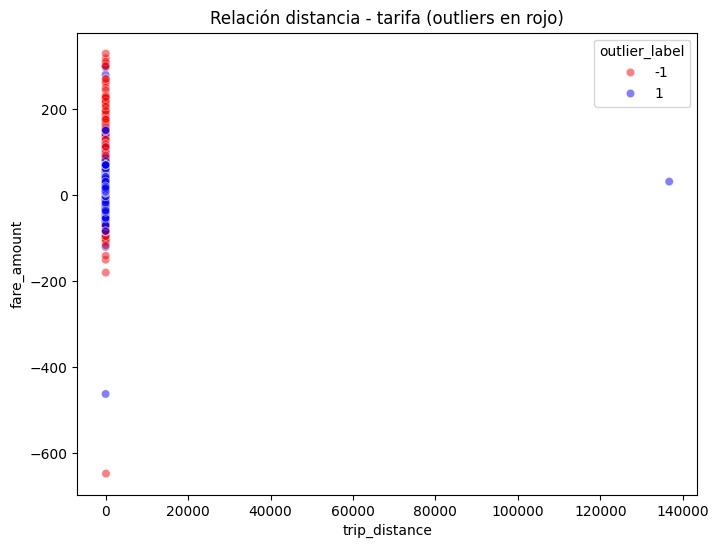

In [56]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_outliers.sample(50000),
                x="trip_distance", y="fare_amount",
                hue="outlier_label", alpha=0.5,
                palette={1:"blue",-1:"red"})
plt.title("Relación distancia - tarifa (outliers en rojo)")
plt.show()

## Conclusión

Los outliers negativos en fare_amount y total_amount corresponden a errores de carga.

Los viajes con distancias y duraciones extremas son probablemente registros inválidos.

Algunos outliers son casos reales: viajes largos (Manhattan–JFK, o a otros aeropuertos) con tarifas altas pero reales.

Mejor Decision: eliminar registros negativos o incoherentes; conservar outliers reales.

# Posible creación de nuevas variables que enriquezcan el análisis.

-